In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Preparations
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Classification Modelling
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Plot Visualizations
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [2]:
survey = pd.read_csv('C:/Users/qehre/Desktop/RR_Project/starbucks.csv')

In [3]:
survey.head()

,Timestamp,Your Gender,Your Age,Are you currently....?,What is your annual income?,How often do you visit Starbucks?,How do you usually enjoy Starbucks?,How much time do you normally spend during your visit?,The nearest Starbucks's outlet to you is...?,Do you have Starbucks membership card?,...,"On average, how much would you spend at Starbucks per visit?","How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",How would you rate the price range at Starbucks?,How important are sales and promotions in your purchase decision?,"How would you rate the ambiance at Starbucks? (lighting, music, etc...)",You rate the WiFi quality at Starbucks as..,"How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",How likely you will choose Starbucks for doing business meetings or hangout with friends?,How do you come to hear of promotions at Starbucks? Check all that apply.,Will you continue buying at Starbucks?
0,5/18/2022 23:04:19,Male,From 20 to 29,Employed,"50,000 - 100,000 PLN",Rarely,Dine in,Between 2 hours to 3 hours,within 1km,No,...,Around 20 - 40 PLN,4,4,4,5,5,4,5,"Social Media, Billboards",Yes
1,5/18/2022 23:13:26,Female,From 20 to 29,Student,"Less than 25,000 PLN",Rarely,Take away,Between 1 hour to 2 hours,1km - 3km,No,...,Around 20 - 40 PLN,3,3,3,1,2,3,3,"Social Media, Through friends and word of mouth",Yes
2,5/18/2022 23:20:36,Female,40 and above,Student,"25,000 -50,000 PLN",Rarely,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than 40 PLN,4,4,5,5,5,4,3,Emails,Yes
3,5/18/2022 23:38:29,Female,From 20 to 29,Student,"25,000 -50,000 PLN",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,No,...,Around 20 - 40 PLN,3,1,2,2,2,5,4,In Store displays,Yes
4,5/18/2022 23:48:49,Female,From 20 to 29,Student,"Less than 25,000 PLN",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Around 20 - 40 PLN,1,5,4,1,4,4,3,Social Media,Yes


In [4]:
data = survey.copy()

In [5]:
data.drop(columns=['Timestamp'], inplace = True)
data.drop(columns=['What do you most frequently purchase at Starbucks?'], inplace = True)
data.drop(columns=['How do you come to hear of promotions at Starbucks? Check all that apply.'], inplace = True)

In [6]:
data.rename({'Your Gender' : 'Gender', 'Your Age' : 'Age', 'Are you currently....?' : 'Work_Status', 'What is your annual income?' : 'Annual_Income', 'How often do you visit Starbucks?' : 'Visit', 'How do you usually enjoy Starbucks?' : 'Visit_Type', 'How do you usually enjoy Starbucks?' : 'Visit_Type', 'How much time do you normally  spend during your visit?' : 'Visit_Duration', "The nearest Starbucks's outlet to you is...?" : 'Distance', 'Do you have Starbucks membership card?' : 'Membership', 'On average, how much would you spend at Starbucks per visit?' : 'Spending', 'How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', 'How would you rate the price range at Starbucks?' : 'Price_Rating', 'How important are sales and promotions in your purchase decision?' : 'Promo_Rating', 'How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', 'You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', 'How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', 'How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout_Rating', 'Will you continue buying at Starbucks?' : 'Loyality'} , inplace = True , axis = 1)

In [7]:
data.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,Membership,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyality
0,Male,From 20 to 29,Employed,"50,000 - 100,000 PLN",Rarely,Dine in,Between 2 hours to 3 hours,within 1km,No,Around 20 - 40 PLN,4,4,4,5,5,4,5,Yes
1,Female,From 20 to 29,Student,"Less than 25,000 PLN",Rarely,Take away,Between 1 hour to 2 hours,1km - 3km,No,Around 20 - 40 PLN,3,3,3,1,2,3,3,Yes
2,Female,40 and above,Student,"25,000 -50,000 PLN",Rarely,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,More than 40 PLN,4,4,5,5,5,4,3,Yes
3,Female,From 20 to 29,Student,"25,000 -50,000 PLN",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,No,Around 20 - 40 PLN,3,1,2,2,2,5,4,Yes
4,Female,From 20 to 29,Student,"Less than 25,000 PLN",Rarely,Take away,Below 30 minutes,more than 3km,No,Around 20 - 40 PLN,1,5,4,1,4,4,3,Yes


In [8]:
data.isnull().any()

Gender             False
Age                False
Work_Status        False
Annual_Income      False
Visit              False
Visit_Type         False
Visit_Duration     False
Distance           False
Membership         False
Spending           False
Product_Rating     False
Price_Rating       False
Promo_Rating       False
Ambiance_Rating    False
Wifi_Rating        False
Service_Rating     False
Hangout_Rating     False
Loyality           False
dtype: bool

In [9]:
data.dtypes

Gender             object
Age                object
Work_Status        object
Annual_Income      object
Visit              object
Visit_Type         object
Visit_Duration     object
Distance           object
Membership         object
Spending           object
Product_Rating      int64
Price_Rating        int64
Promo_Rating        int64
Ambiance_Rating     int64
Wifi_Rating         int64
Service_Rating      int64
Hangout_Rating      int64
Loyality           object
dtype: object

In [10]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
data['Age'].unique()

array(['From 20 to 29', '40 and above', 'Below 20', 'From 30 to 39'],
      dtype=object)

In [12]:
data['Visit_Type'].unique()

array(['Dine in', 'Take away'], dtype=object)

In [13]:
data['Work_Status'].unique()

array(['Employed', 'Student', 'Self-employed', 'Unemployed'], dtype=object)

In [14]:
data['Annual_Income'].unique()

array(['50,000 - 100,000 PLN', 'Less than 25,000 PLN',
       '25,000 -50,000 PLN', '100,000 - 150,000 PLN'], dtype=object)

In [15]:
data['Visit'].unique()

array(['Rarely', 'Monthly', 'Never', 'Weekly', 'Daily'], dtype=object)

In [16]:
data['Visit_Duration'].unique()

array(['Between 2 hours to 3 hours', 'Between 1 hour to 2 hours',
       'Between 30 minutes to 1 hour', 'Below 30 minutes',
       'More than 3 hours'], dtype=object)

In [17]:
data['Distance'].unique()

array(['within 1km', '1km - 3km', 'more than 3km'], dtype=object)

In [18]:
data['Membership'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data['Spending'].unique()

array(['Around 20 - 40 PLN', 'More than 40 PLN', 'Less than 20 PLN',
       'Zero'], dtype=object)

In [20]:
data["Gender"].replace({"Female": 1, "Male": 0}, inplace=True)
data["Age"].replace({"Below 20": 0, "From 20 to 29": 1, "From 30 to 39": 2, "40 and above": 3}, inplace=True)
data["Work_Status"].replace({"Student": 0, "Employed": 1, "Self-employed": 2, "Unemployed": 3}, inplace=True)
data["Annual_Income"].replace({"Less than 25,000 PLN": 0, "25,000 -50,000 PLN": 1, "50,000 - 100,000 PLN": 2, "100,000 - 150,000 PLN": 3, "More than 150,000 PLN": 4}, inplace=True)
data["Visit"].replace({"Never": 0, "Rarely": 1, "Monthly": 2, "Weekly": 3, "Daily": 4}, inplace=True)
data["Visit_Duration"].replace({"Below 30 minutes": 0, "Between 30 minutes to 1 hour": 1, "Between 1 hour to 2 hours": 2, "Between 2 hours to 3 hours": 3, "More than 3 hours": 4}, inplace=True)
data["Distance"].replace({"within 1km": 0, "1km - 3km": 1, "more than 3km": 2}, inplace=True)
data["Visit_Type"].replace({"Take away": 0, "Dine in": 1}, inplace=True)
data["Membership"].replace({"No": 0, "Yes": 1}, inplace=True)
data["Spending"].replace({"Zero": 0, "Less than 20 PLN": 1, "Around 20 - 40 PLN": 2, "More than 40 PLN": 3}, inplace=True)

In [21]:
data.dtypes

Gender              int64
Age                 int64
Work_Status         int64
Annual_Income       int64
Visit               int64
Visit_Type          int64
Visit_Duration      int64
Distance            int64
Membership          int64
Spending            int64
Product_Rating      int64
Price_Rating        int64
Promo_Rating        int64
Ambiance_Rating     int64
Wifi_Rating         int64
Service_Rating      int64
Hangout_Rating      int64
Loyality           object
dtype: object

In [22]:
data.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,Membership,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyality
0,0,1,1,2,1,1,3,0,0,2,4,4,4,5,5,4,5,Yes
1,1,1,0,0,1,0,2,1,0,2,3,3,3,1,2,3,3,Yes
2,1,3,0,1,1,1,2,1,1,3,4,4,5,5,5,4,3,Yes
3,1,1,0,1,1,1,1,0,0,2,3,1,2,2,2,5,4,Yes
4,1,1,0,0,1,0,0,2,0,2,1,5,4,1,4,4,3,Yes


In [23]:
# Retrieve dataset
datasb = data
# Split in X and y
X, y = datasb.iloc[:,:-1], datasb.iloc[:,-1]

# The dataset is divided into two, for training data and testing data
# Data Training : Data Testing - 70% : 30%
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=123)

In [24]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=123, learning_rate=0.1, max_depth=5, colsample_bytree=1, subsample=1)

In [25]:
xg_cl.fit(X_train,y_train)

[18:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
preds = xg_cl.predict(X_test)

In [27]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("Accuracy: %f" % (accuracy))

Accuracy: 0.909091


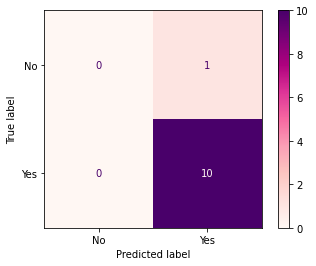

In [28]:
plot_confusion_matrix(xg_cl,X_test,y_test,cmap='RdPu')

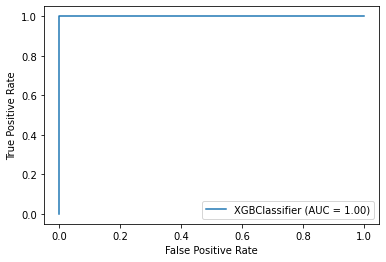

In [29]:
plot_roc_curve(xg_cl,X_test,y_test)

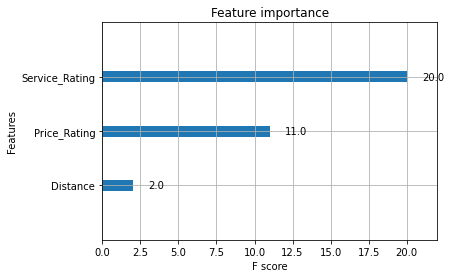

In [30]:
xgb.plot_importance(xg_cl)
plt.show()